Length of Transform: 256


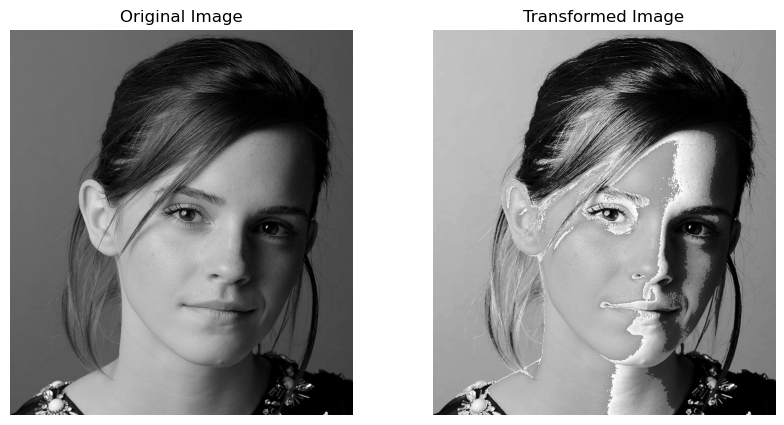

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity transformation points based on the given function
# 0 to 50 -> 0 to 50, 50 to 150 -> 100 to 255, 150 to 255 -> 150 to 255
c = np.array([(50, 50), (150, 255)])

# Create the intensity transformation segments
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')  # From 0 to 50, output from 0 to 50
t2 = np.linspace(100, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # From 51 to 150, output from 100 to 255
t3 = np.linspace(151, 255, 255 - c[1, 0]).astype('uint8')  # From 151 to 255, output from 150 to 255

# Concatenate the segments to form the full transformation array
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(f"Length of Transform: {len(transform)}")

# Load the grayscale image
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Apply the intensity transformation using cv.LUT
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()


<img src="Brain_White_Grey.png" alt="Optional Title" width="600"/>


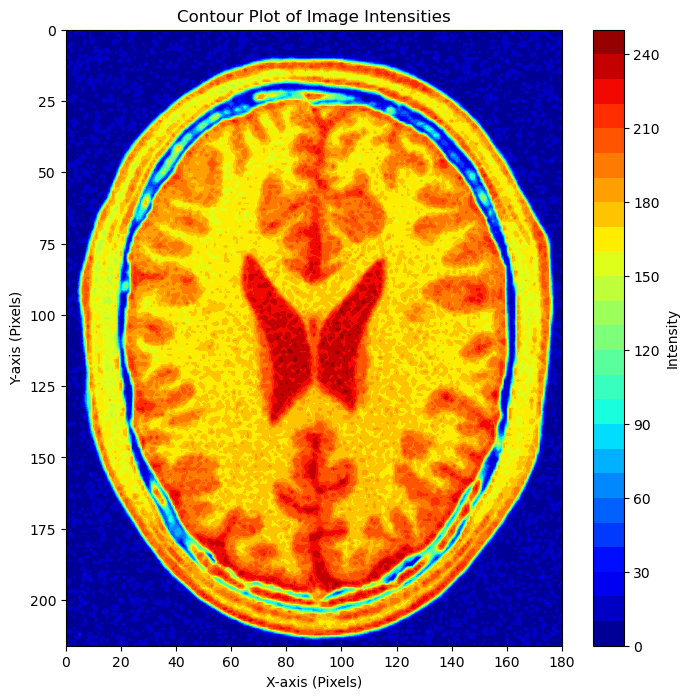

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Display a contour plot with intensity values in increments of 10
def plot_contour_image(img, step=10):
    # Create a meshgrid for the pixel coordinates
    y, x = np.mgrid[0:img.shape[0], 0:img.shape[1]]

    # Define contour levels with increments of 10
    levels = np.arange(0, 255, step)
    
    # Create the contour plot
    plt.figure(figsize=(8, 8))
    contour = plt.contourf(x, y, img, levels=levels, cmap='jet')
    plt.colorbar(contour, label="Intensity")
    
    # Set labels and display
    plt.title("Contour Plot of Image Intensities")
    plt.xlabel("X-axis (Pixels)")
    plt.ylabel("Y-axis (Pixels)")
    plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinates
    plt.show()

# Plot the contour of the brain image with increments of 10
plot_contour_image(img_orig, step=10)


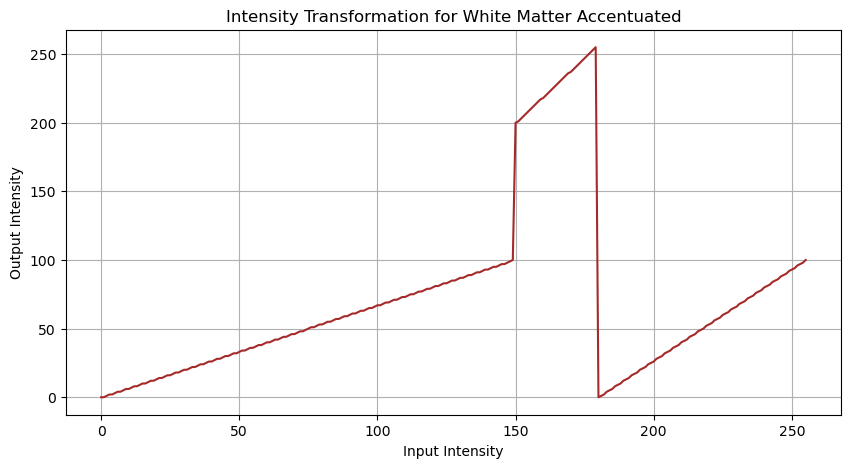

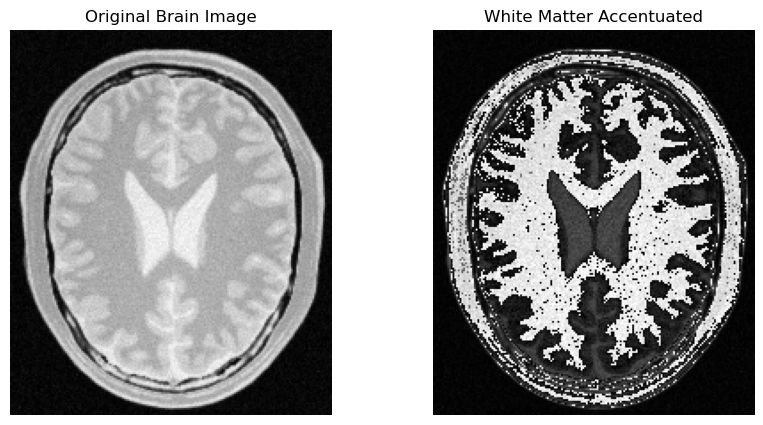

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Define transformation to accentuate white matter (150-180)
def white_matter_transformation():
    # Mapping intensities:
    # 0-149 -> 0-100
    # 150-179 -> 200-255 (white matter)
    # 180-255 -> 0-100

    # Create intensity transformation segments
    t1 = np.linspace(0, 100, 150).astype('uint8')  # From 0 to 149, mapped to 0-100
    t2 = np.linspace(200, 255, 30).astype('uint8')  # From 150 to 179, mapped to 200-255 (white matter)
    t3 = np.linspace(0, 100, 76).astype('uint8')   # From 180 to 255, mapped to 0-100
    
    # Concatenate the segments to form the full transformation array
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    
    # Verify the length of the transformation array
    assert len(transform) == 256, f"Transformation array size incorrect: {len(transform)}"
    
    return transform

# Apply the transformation
white_transform = white_matter_transformation()

# Apply the intensity transformation using cv.LUT
image_white_matter = cv.LUT(img_orig, white_transform)

# Plot the intensity transformation
input_intensity = np.arange(256)
output_intensity = white_transform

plt.figure(figsize=(10, 5))
plt.plot(input_intensity, output_intensity, color='brown')
plt.title('Intensity Transformation for White Matter Accentuated')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

# Display the original and white-matter-accentuated images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Brain Image')
ax[0].axis('off')

ax[1].imshow(image_white_matter, cmap='gray')
ax[1].set_title('White Matter Accentuated')
ax[1].axis('off')

plt.show()

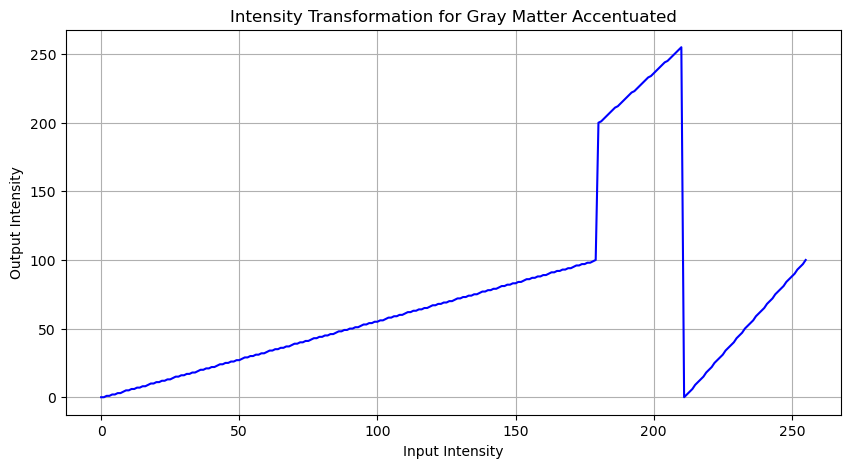

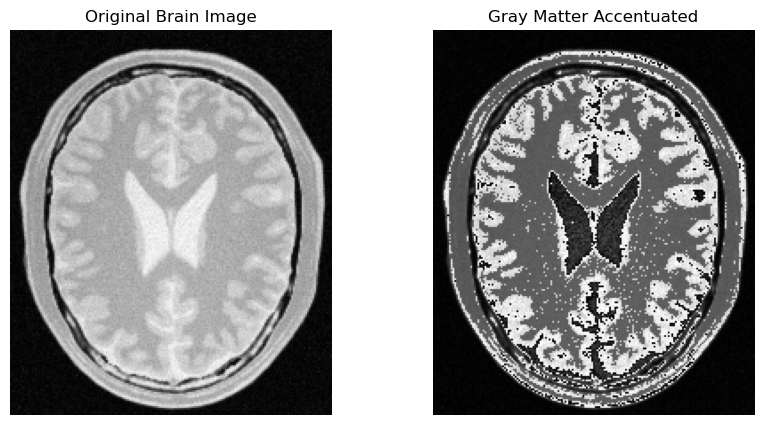

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Define transformation to accentuate gray matter (180-210)
def gray_matter_transformation():
    # Mapping intensities:
    # 0-179 -> 0-100
    # 180-210 -> 200-255 (gray matter)
    # 211-255 -> 0-100

    # Create intensity transformation segments
    t1 = np.linspace(0, 100, 180).astype('uint8')  # From 0 to 179, mapped to 0-100
    t2 = np.linspace(200, 255, 31).astype('uint8')  # From 180 to 210, mapped to 200-255 (gray matter)
    t3 = np.linspace(0, 100, 45).astype('uint8')   # From 211 to 255, mapped to 0-100
    
    # Concatenate the segments to form the full transformation array
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    
    # Verify the length of the transformation array
    assert len(transform) == 256, f"Transformation array size incorrect: {len(transform)}"
    
    return transform

# Apply the transformation
gray_transform = gray_matter_transformation()

# Apply the intensity transformation using cv.LUT
image_gray_matter = cv.LUT(img_orig, gray_transform)

# Plot the intensity transformation for gray matter
input_intensity = np.arange(256)
output_intensity = gray_transform

plt.figure(figsize=(10, 5))
plt.plot(input_intensity, output_intensity, color='blue')
plt.title('Intensity Transformation for Gray Matter Accentuated')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

# Display the original and gray-matter-accentuated images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Brain Image')
ax[0].axis('off')

ax[1].imshow(image_gray_matter, cmap='gray')
ax[1].set_title('Gray Matter Accentuated')
ax[1].axis('off')

plt.show()

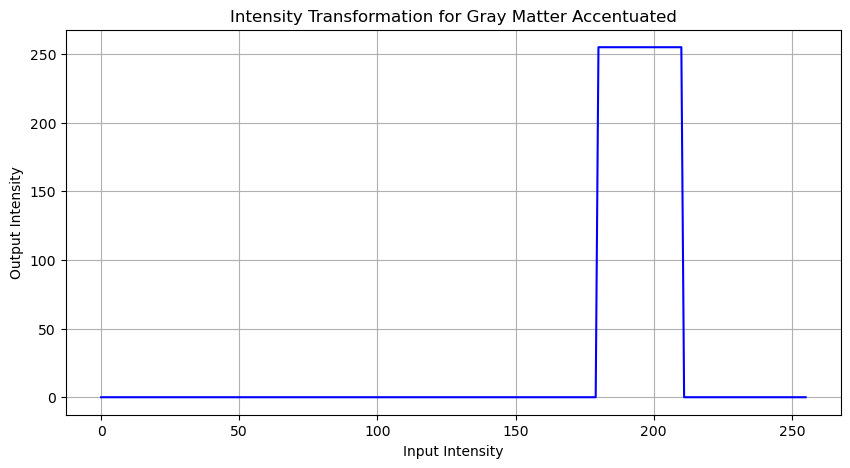

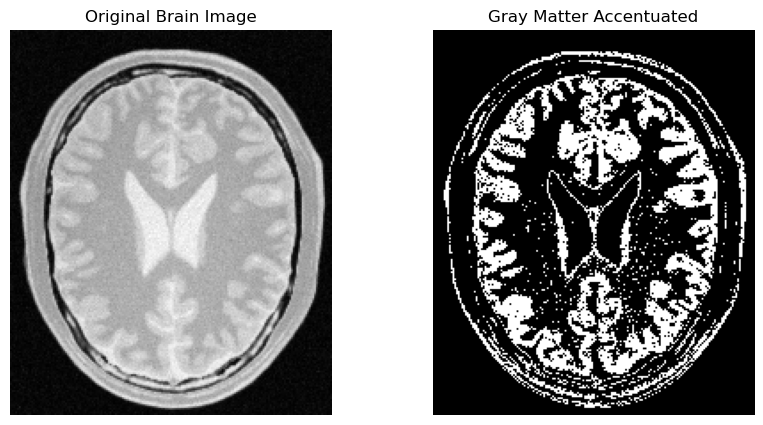

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Define transformation to accentuate gray matter (180-210)
def gray_matter_transformation():
    # Set intensities:
    # 0-179 -> 0 (suppress everything below gray matter)
    # 180-210 -> 255 (accentuate gray matter)
    # 211-255 -> 0 (suppress everything above gray matter)

    # Create intensity transformation segments
    t1 = np.zeros(180, dtype='uint8')  # From 0 to 179, set to 0
    t2 = np.ones(31, dtype='uint8') * 255  # From 180 to 210, set to 255 (gray matter)
    t3 = np.zeros(45, dtype='uint8')  # From 211 to 255, set to 0
    
    # Concatenate the segments to form the full transformation array
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    
    # Verify the length of the transformation array
    assert len(transform) == 256, f"Transformation array size incorrect: {len(transform)}"
    
    return transform

# Apply the transformation
gray_transform = gray_matter_transformation()

# Apply the intensity transformation using cv.LUT
image_gray_matter = cv.LUT(img_orig, gray_transform)

# Plot the intensity transformation for gray matter
input_intensity = np.arange(256)
output_intensity = gray_transform

plt.figure(figsize=(10, 5))
plt.plot(input_intensity, output_intensity, color='blue')
plt.title('Intensity Transformation for Gray Matter Accentuated')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

# Display the original and gray-matter-accentuated images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Brain Image')
ax[0].axis('off')

ax[1].imshow(image_gray_matter, cmap='gray')
ax[1].set_title('Gray Matter Accentuated')
ax[1].axis('off')

plt.show()

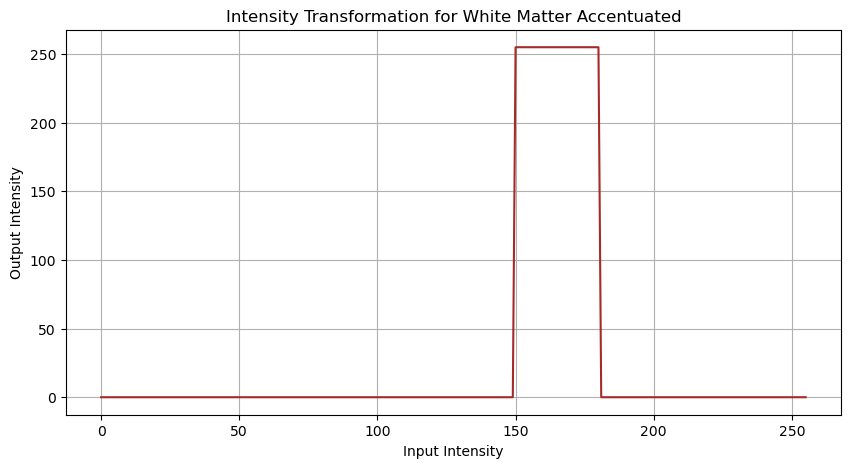

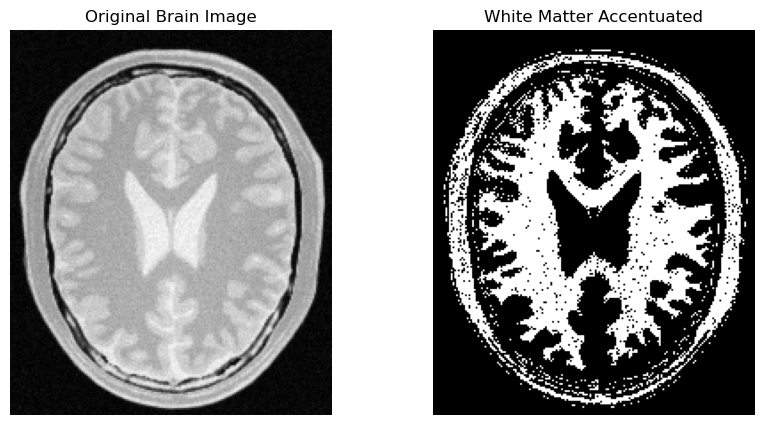

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Define transformation to accentuate white matter (150-180)
def white_matter_transformation():
    # Set intensities:
    # 0-149 -> 0 (suppress everything below white matter)
    # 150-180 -> 255 (accentuate white matter)
    # 181-255 -> 0 (suppress everything above white matter)

    # Create intensity transformation segments
    t1 = np.zeros(150, dtype='uint8')  # From 0 to 149, set to 0
    t2 = np.ones(31, dtype='uint8') * 255  # From 150 to 180, set to 255 (white matter)
    t3 = np.zeros(75, dtype='uint8')  # From 181 to 255, set to 0
    
    # Concatenate the segments to form the full transformation array
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    
    # Verify the length of the transformation array
    assert len(transform) == 256, f"Transformation array size incorrect: {len(transform)}"
    
    return transform

# Apply the transformation
white_transform = white_matter_transformation()

# Apply the intensity transformation using cv.LUT
image_white_matter = cv.LUT(img_orig, white_transform)

# Plot the intensity transformation for white matter
input_intensity = np.arange(256)
output_intensity = white_transform

plt.figure(figsize=(10, 5))
plt.plot(input_intensity, output_intensity, color='brown')
plt.title('Intensity Transformation for White Matter Accentuated')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

# Display the original and white-matter-accentuated images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Brain Image')
ax[0].axis('off')

ax[1].imshow(image_white_matter, cmap='gray')
ax[1].set_title('White Matter Accentuated')
ax[1].axis('off')

plt.show()

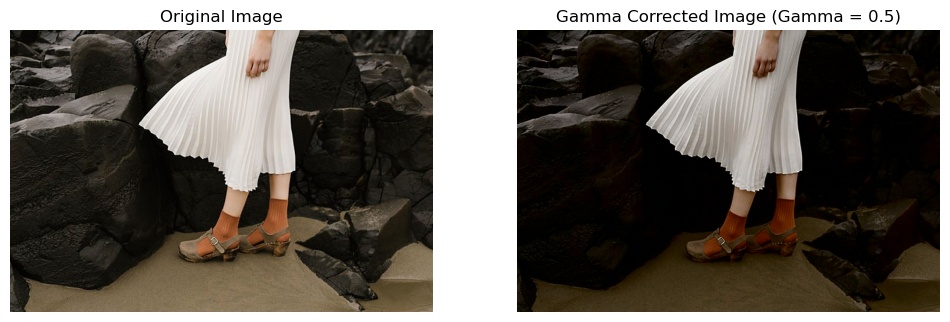

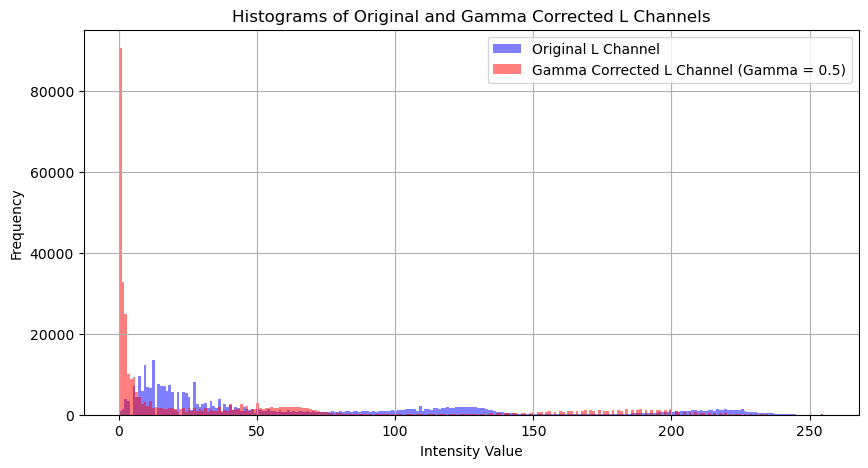

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('highlights_and_shadows.jpg')
assert img is not None, "Error: Image not found!"

# Convert the image from BGR to LAB color space
lab_img = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Split the LAB image into separate channels
L, a, b = cv.split(lab_img)

# Define the gamma correction function
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    # Create a lookup table to apply gamma correction
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Apply gamma correction to the L channel
gamma_value = 0.5  # Example gamma value
L_gamma_corrected = gamma_correction(L, gamma_value)

# Merge the modified L channel with the original a and b channels
lab_img_corrected = cv.merge([L_gamma_corrected, a, b])

# Convert the LAB image back to BGR color space
img_corrected = cv.cvtColor(lab_img_corrected, cv.COLOR_Lab2BGR)

# Display the original and corrected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Gamma Corrected Image (Gamma = {gamma_value})')
ax[1].axis('off')

plt.show()

# Plot the histograms of the original and gamma-corrected L channels
plt.figure(figsize=(10, 5))
plt.hist(L.ravel(), bins=256, color='blue', alpha=0.5, label='Original L Channel')
plt.hist(L_gamma_corrected.ravel(), bins=256, color='red', alpha=0.5, label=f'Gamma Corrected L Channel (Gamma = {gamma_value})')
plt.title('Histograms of Original and Gamma Corrected L Channels')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


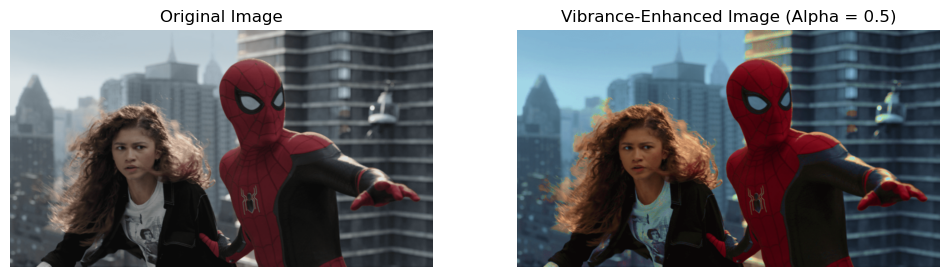

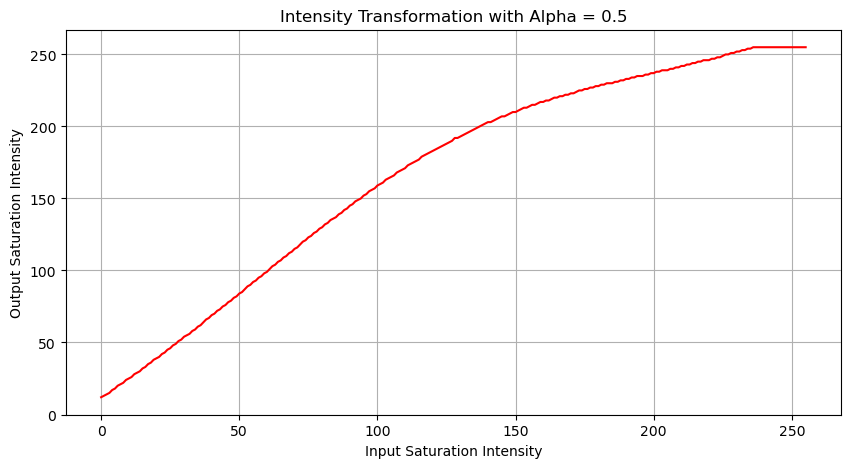

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('spider.png')
assert img is not None, "Error: Image not found!"

# Convert the image from BGR to HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV image into three channels: Hue, Saturation, and Value
h, s, v = cv.split(hsv_img)

# Define the vibrance enhancement function
def vibrance_transform(x, alpha, sigma=70):
    # Apply the vibrance intensity transformation function
    return np.clip(x + alpha * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)

# Define the alpha value for vibrance enhancement
alpha = 0.5

# Apply the vibrance transformation to the saturation channel
s_vibrance_enhanced = vibrance_transform(s, alpha)

# Recombine the H, modified S (saturation), and V channels
hsv_vibrance_enhanced = cv.merge([h, s_vibrance_enhanced, v])

# Convert the vibrance-enhanced HSV image back to BGR
img_vibrance_enhanced = cv.cvtColor(hsv_vibrance_enhanced, cv.COLOR_HSV2BGR)

# Display the original and vibrance-enhanced images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_vibrance_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Vibrance-Enhanced Image (Alpha = {alpha})')
ax[1].axis('off')

plt.show()

# Plot the intensity transformation curve for reference
x_vals = np.arange(256)
y_vals = vibrance_transform(x_vals, alpha)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, color='red')
plt.title(f'Intensity Transformation with Alpha = {alpha}')
plt.xlabel('Input Saturation Intensity')
plt.ylabel('Output Saturation Intensity')
plt.grid(True)
plt.show()
